In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
from gensim.models import Word2Vec

# Load datasets with error handling
datasets = []
files = ["Youtube01-Psy.csv", "Youtube02-KatyPerry.csv", "Youtube03-LMFAO.csv", "Youtube04-Eminem.csv", "Youtube05-Shakira.csv"]
for file in files:
    try:
        df = pd.read_csv(file)
        datasets.append(df)
    except FileNotFoundError:
        print(f"File '{file}' not found.")
        continue

# Merge all datasets
dataset = pd.concat(datasets, ignore_index=True)

# Filter relevant columns
dataset = dataset[["CONTENT", "CLASS"]]

# Split predictor and target attributes
X = dataset['CONTENT']
y = dataset['CLASS']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# Feature extraction
tfidf = TfidfVectorizer(ngram_range=(1, 3), max_df=0.8, min_df=5, sublinear_tf=True)
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

cv = CountVectorizer(ngram_range=(1, 2), max_df=0.95, min_df=5)
X_train_cv = cv.fit_transform(X_train).toarray()
X_test_cv = cv.transform(X_test).toarray()

w2v = Word2Vec(sentences=[row.split() for row in X_train], vector_size=100, window=5, min_count=10, workers=4)
X_train_w2v = np.array([np.mean([w2v.wv[word] for word in sentence.split() if word in w2v.wv] or [np.zeros(100)], axis=0) for sentence in X_train])
X_test_w2v = np.array([np.mean([w2v.wv[word] for word in sentence.split() if word in w2v.wv] or [np.zeros(100)], axis=0) for sentence in X_test])

# Initialize individual models
random_forest = RandomForestClassifier(n_estimators=110, criterion='entropy', random_state=0)
gradient_boosting = GradientBoostingClassifier()

# Create a Voting Classifier
ensemble_classifier = VotingClassifier(estimators=[
    ('random_forest', random_forest),
    ('gradient_boosting', gradient_boosting)
], voting='hard')

# Fit the ensemble model to the training data for each feature set
ensemble_classifier.fit(X_train_tfidf, y_train)
y_pred_tfidf = ensemble_classifier.predict(X_test_tfidf)
ensemble_classifier.fit(X_train_cv, y_train)
y_pred_cv = ensemble_classifier.predict(X_test_cv)
ensemble_classifier.fit(X_train_w2v, y_train)
y_pred_w2v = ensemble_classifier.predict(X_test_w2v)

# Evaluate the results for each feature set
#print("TF-IDF:")
#print('Accuracy Score:', accuracy_score(y_test, y_pred_tfidf))
#print('Precision Score:', precision_score(y_test, y_pred_tfidf))
#print('True positive Rate:', recall_score(y_test, y_pred_tfidf))
#print('False positive Rate:', 1 - recall_score(y_test, y_pred_tfidf))
#print('F1 Score:', f1_score(y_test, y_pred_tfidf))
#print('Specificity:', 1 - (1 - recall_score(y_test, y_pred_tfidf)))
#print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_tfidf))


print("\nCountVectorizer:")
print('Accuracy Score:', accuracy_score(y_test, y_pred_cv))
print('Precision Score:', precision_score(y_test, y_pred_cv))
print('True positive Rate:', recall_score(y_test, y_pred_cv))
print('False positive Rate:', 1 - recall_score(y_test, y_pred_cv))
print('F1 Score:', f1_score(y_test, y_pred_cv))
print('Specificity:', 1 - (1 - recall_score(y_test, y_pred_cv)))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_cv))




CountVectorizer:
Accuracy Score: 0.9744897959183674
Precision Score: 1.0
True positive Rate: 0.9487179487179487
False positive Rate: 0.05128205128205132
F1 Score: 0.9736842105263158
Specificity: 0.9487179487179487
Mean Absolute Error: 0.025510204081632654


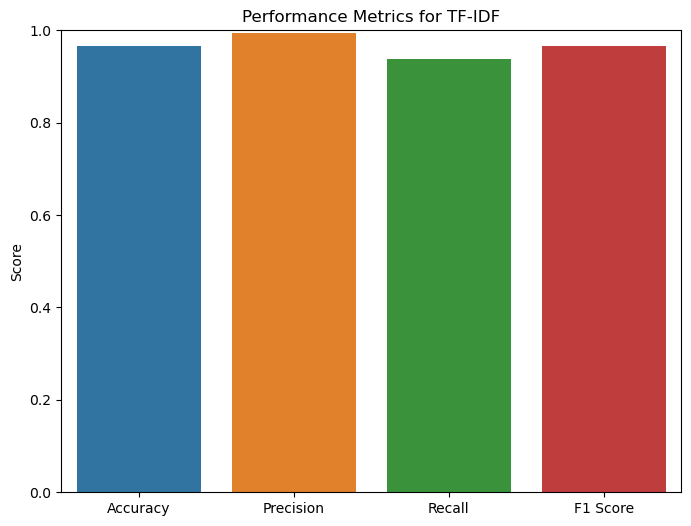

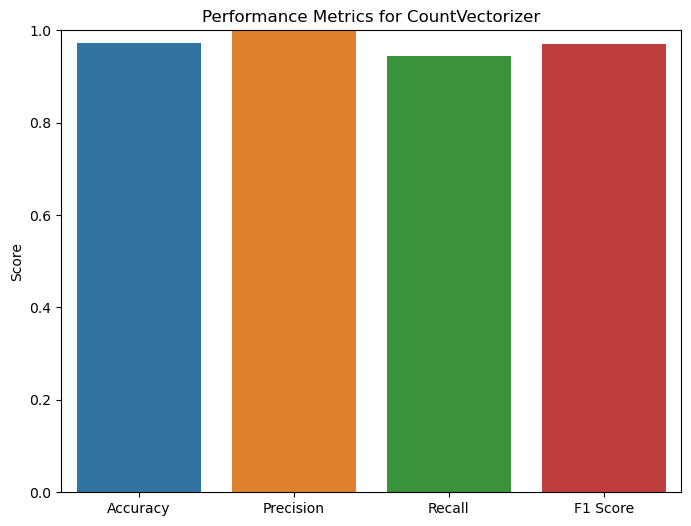

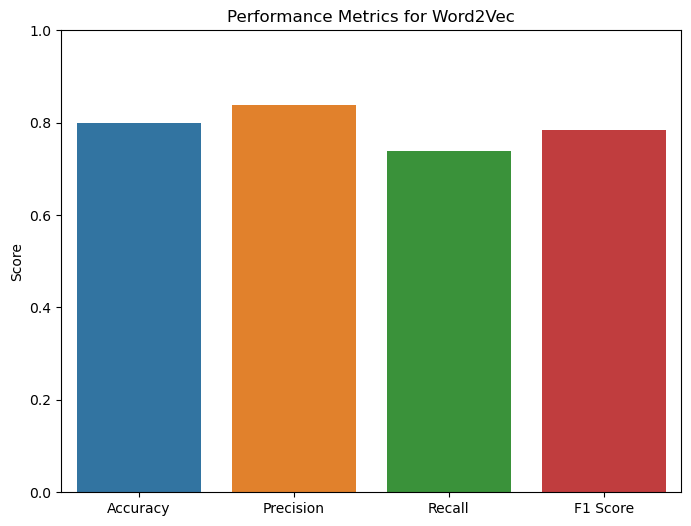

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
from gensim.models import Word2Vec

# Load datasets with error handling
datasets = []
files = ["Youtube01-Psy.csv", "Youtube02-KatyPerry.csv", "Youtube03-LMFAO.csv", "Youtube04-Eminem.csv", "Youtube05-Shakira.csv"]
for file in files:
    try:
        df = pd.read_csv(file)
        datasets.append(df)
    except FileNotFoundError:
        print(f"File '{file}' not found.")
        continue

# Merge all datasets
dataset = pd.concat(datasets, ignore_index=True)

# Filter relevant columns
dataset = dataset[["CONTENT", "CLASS"]]

# Split predictor and target attributes
X = dataset['CONTENT']
y = dataset['CLASS']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# Feature extraction
tfidf = TfidfVectorizer(ngram_range=(1, 3), max_df=0.8, min_df=5, sublinear_tf=True)
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

cv = CountVectorizer(ngram_range=(1, 2), max_df=0.95, min_df=5)
X_train_cv = cv.fit_transform(X_train).toarray()
X_test_cv = cv.transform(X_test).toarray()

w2v = Word2Vec(sentences=[row.split() for row in X_train], vector_size=100, window=5, min_count=10, workers=4)
X_train_w2v = np.array([np.mean([w2v.wv[word] for word in sentence.split() if word in w2v.wv] or [np.zeros(100)], axis=0) for sentence in X_train])
X_test_w2v = np.array([np.mean([w2v.wv[word] for word in sentence.split() if word in w2v.wv] or [np.zeros(100)], axis=0) for sentence in X_test])

# Initialize individual models
random_forest = RandomForestClassifier(n_estimators=110, criterion='entropy', random_state=0)
gradient_boosting = GradientBoostingClassifier()

# Create a Voting Classifier
ensemble_classifier = VotingClassifier(estimators=[
    ('random_forest', random_forest),
    ('gradient_boosting', gradient_boosting)
], voting='hard')

# Fit the ensemble model to the training data for each feature set
ensemble_classifier.fit(X_train_tfidf, y_train)
y_pred_tfidf = ensemble_classifier.predict(X_test_tfidf)
ensemble_classifier.fit(X_train_cv, y_train)
y_pred_cv = ensemble_classifier.predict(X_test_cv)
ensemble_classifier.fit(X_train_w2v, y_train)
y_pred_w2v = ensemble_classifier.predict(X_test_w2v)

# Evaluate the results for each feature set
metrics = {
    'TF-IDF': {'Accuracy': accuracy_score(y_test, y_pred_tfidf), 'Precision': precision_score(y_test, y_pred_tfidf), 
               'Recall': recall_score(y_test, y_pred_tfidf), 'F1 Score': f1_score(y_test, y_pred_tfidf)},
    'CountVectorizer': {'Accuracy': accuracy_score(y_test, y_pred_cv), 'Precision': precision_score(y_test, y_pred_cv), 
                        'Recall': recall_score(y_test, y_pred_cv), 'F1 Score': f1_score(y_test, y_pred_cv)},
    'Word2Vec': {'Accuracy': accuracy_score(y_test, y_pred_w2v), 'Precision': precision_score(y_test, y_pred_w2v), 
                 'Recall': recall_score(y_test, y_pred_w2v), 'F1 Score': f1_score(y_test, y_pred_w2v)}
}

# Plot performance metrics for each feature extraction technique
for feature_extraction, metrics_dict in metrics.items():
    plt.figure(figsize=(8, 6))
    sns.barplot(x=list(metrics_dict.keys()), y=list(metrics_dict.values()))
    plt.title(f'Performance Metrics for {feature_extraction}')
    plt.ylabel('Score')
    plt.ylim(0, 1)  # Set y-axis limit to 0-1 for better visualization of scores
    plt.show()


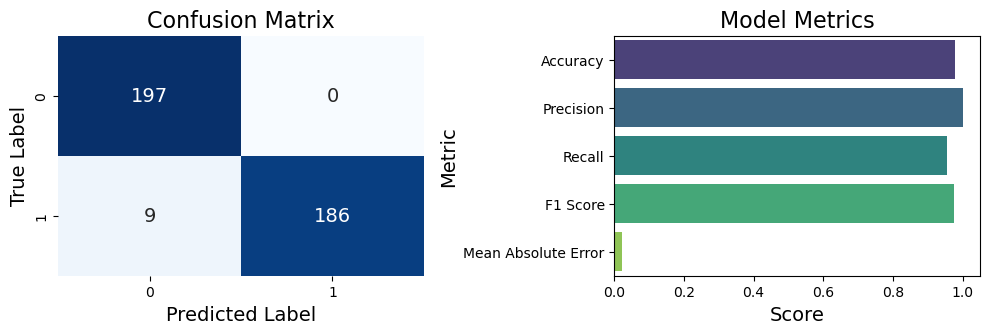

Accuracy: 0.9770408163265306
Precision: 1.0
Recall: 0.9538461538461539
F1 Score: 0.9763779527559054
Mean Absolute Error: 0.02295918367346939

Confusion Matrix:
[[197   0]
 [  9 186]]


In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error

# Load datasets with error handling
datasets = []
files = ["Youtube01-Psy.csv", "Youtube02-KatyPerry.csv", "Youtube03-LMFAO.csv", "Youtube04-Eminem.csv", "Youtube05-Shakira.csv"]
for file in files:
    try:
        df = pd.read_csv(file)
        datasets.append(df)
    except FileNotFoundError:
        print(f"File '{file}' not found.")
        continue

# Merge all datasets
dataset = pd.concat(datasets, ignore_index=True)

# Filter relevant columns
dataset = dataset[["CONTENT", "CLASS"]]

# Split predictor and target attributes
X = dataset['CONTENT']
y = dataset['CLASS']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# Feature extraction
cv = CountVectorizer(ngram_range=(1, 2), max_df=0.95, min_df=5)
X_train_cv = cv.fit_transform(X_train).toarray()
X_test_cv = cv.transform(X_test).toarray()

# Initialize individual models
random_forest = RandomForestClassifier(n_estimators=110, criterion='entropy', random_state=0)
gradient_boosting = GradientBoostingClassifier()

# Create a Voting Classifier
ensemble_classifier = VotingClassifier(estimators=[
    ('random_forest', random_forest),
    ('gradient_boosting', gradient_boosting)
], voting='hard')

# Fit the ensemble model to the training data for each feature set
ensemble_classifier.fit(X_train_cv, y_train)
y_pred_cv = ensemble_classifier.predict(X_test_cv) 

# Metrics
accuracy = accuracy_score(y_test, y_pred_cv)
precision = precision_score(y_test, y_pred_cv)
recall = recall_score(y_test, y_pred_cv)
f1 = f1_score(y_test, y_pred_cv)
mae = mean_absolute_error(y_test, y_pred_cv)
conf_matrix = confusion_matrix(y_test, y_pred_cv)

# Graphs
plt.figure(figsize=(10, 6))

# Confusion Matrix Heatmap
plt.subplot(2, 2, 1)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size": 14})
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)

# Metrics Bar Plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean Absolute Error']
values = [accuracy, precision, recall, f1, mae]
plt.subplot(2, 2, 2)
sns.barplot(x=values, y=metrics, palette="viridis")
plt.title("Model Metrics", fontsize=16)
plt.xlabel("Score", fontsize=14)
plt.ylabel("Metric", fontsize=14)

# ROC Curve (if applicable)
# roc_auc = roc_auc_score(y_test, y_pred_cv)
# fpr, tpr, _ = roc_curve(y_test, y_pred_cv)
# plt.subplot(2, 2, 3)
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate', fontsize=14)
# plt.ylabel('True Positive Rate', fontsize=14)
# plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
# plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Print Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Mean Absolute Error:", mae)

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(conf_matrix)


